<a href="https://colab.research.google.com/github/diazameer/Image-Classification/blob/main/shape_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Packages

In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import imutils
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [2]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Defining our shape detector

In [3]:
class ShapeDetector:
	def __init__(self):
		pass

	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)

		# if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"

		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)

			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"

		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"

		# return the name of the shape
		return shape

### Shape detection with OpenCV

In [4]:
!wget https://i.ibb.co/xzN0PXn/shapes.jpg

--2021-05-19 08:29:27--  https://i.ibb.co/xzN0PXn/shapes.jpg
Resolving i.ibb.co (i.ibb.co)... 172.96.140.18, 104.194.8.196
Connecting to i.ibb.co (i.ibb.co)|172.96.140.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39540 (39K) [image/jpeg]
Saving to: ‘shapes.jpg’

shapes.jpg          100%[===================>]  38.61K  --.-KB/s    in 0.009s  

2021-05-19 08:29:27 (4.42 MB/s) - ‘shapes.jpg’ saved [39540/39540]



In [5]:
args = {
	"image": "shapes.jpg"
}

In [6]:
# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread(args["image"])
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])

# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

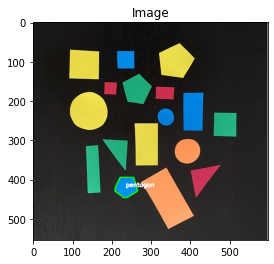

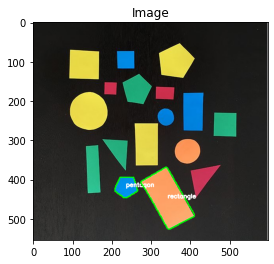

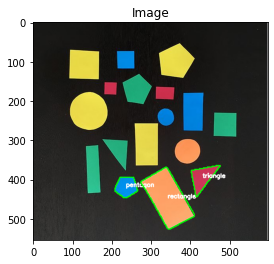

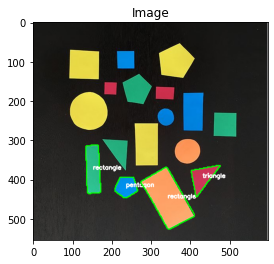

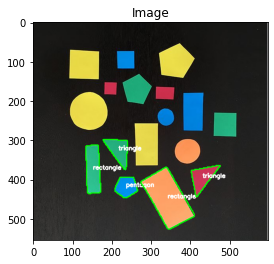

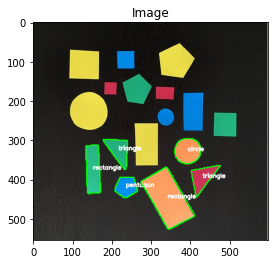

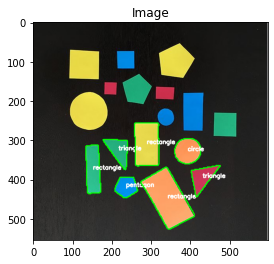

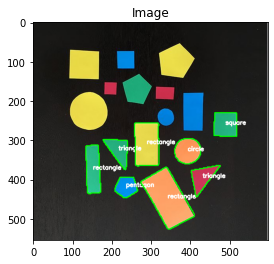

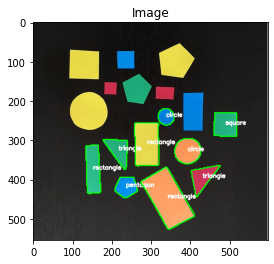

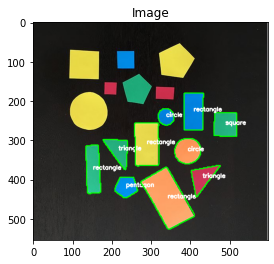

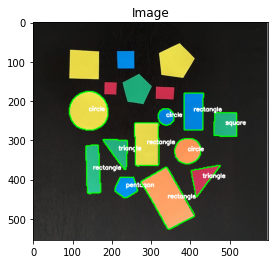

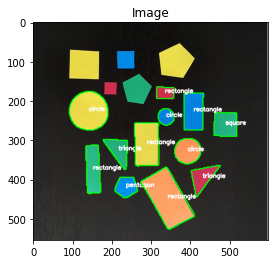

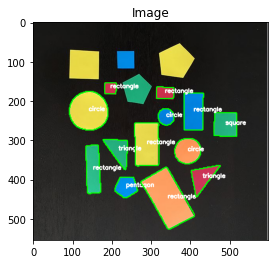

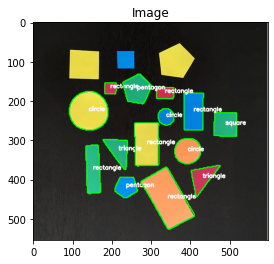

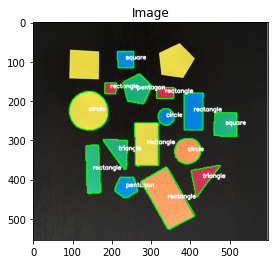

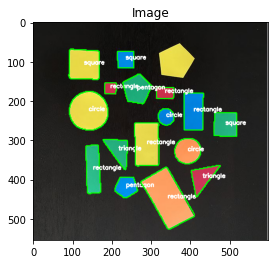

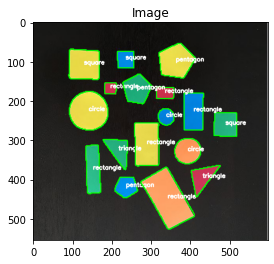

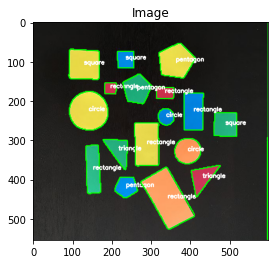

In [7]:
# loop over the contours
for c in cnts:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = sd.detect(c)

	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)

	# show the output image
	plt_imshow("Image", image)

In [8]:
cv2.imwrite('output.jpg',image)

True

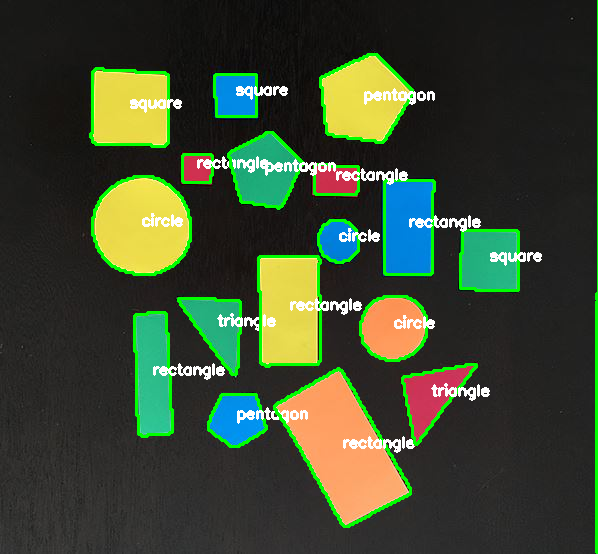

In [9]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)